In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from docx.shared import Pt
from docx import Document
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
df = pd.read_csv("COP2019_participation.csv")

In [5]:
df.head()

,name,entity_type,TotalMembers,MaleMembers,FemaleMembers
0,Afghanistan,Parties,15,13,2
1,Albania,Parties,2,1,1
2,Algeria,Parties,26,16,10
3,Andorra,Parties,8,5,3
4,Angola,Parties,23,16,7


In [6]:
df.iloc[300:500,:]

,name,entity_type,TotalMembers,MaleMembers,FemaleMembers
300,Islamic Development Bank,Intergovernmental organizations,8,8,0
301,League of Arab States,Intergovernmental organizations,2,2,0
302,Nordic Council,Intergovernmental organizations,4,2,2
303,Nordic Council of Ministers,Intergovernmental organizations,20,11,9
304,Nordic Environment Finance Corporation,Intergovernmental organizations,5,5,0
...,...,...,...,...,...
495,China Dialogue Trust,Non-governmental organizations,3,1,2
496,China Green Carbon Foundation,Non-governmental organizations,10,9,1
497,China New Energy Chamber of Commerce,Non-governmental organizations,26,17,9
498,China Science and Technology Exchange Center,Non-governmental organizations,7,3,4


In [9]:
TotalFemales = df.FemaleMembers.sum()
print(TotalFemales)

6110


In [10]:
TotalMales = df.MaleMembers.sum()
print(TotalMales)

7838


In [12]:
male_and_female = {"Males(Mr./Sr.)":TotalMales, "Females(Ms./Mrs./Sra./Mme.)":TotalFemales}

In [22]:
values = list(male_and_female.values())
print(values, type(values))
labels = list(male_and_female.keys())
print(labels, type(labels))

[7838, 6110] <class 'list'>
['Males(Mr./Sr.)', 'Females(Ms./Mrs./Sra./Mme.)'] <class 'list'>


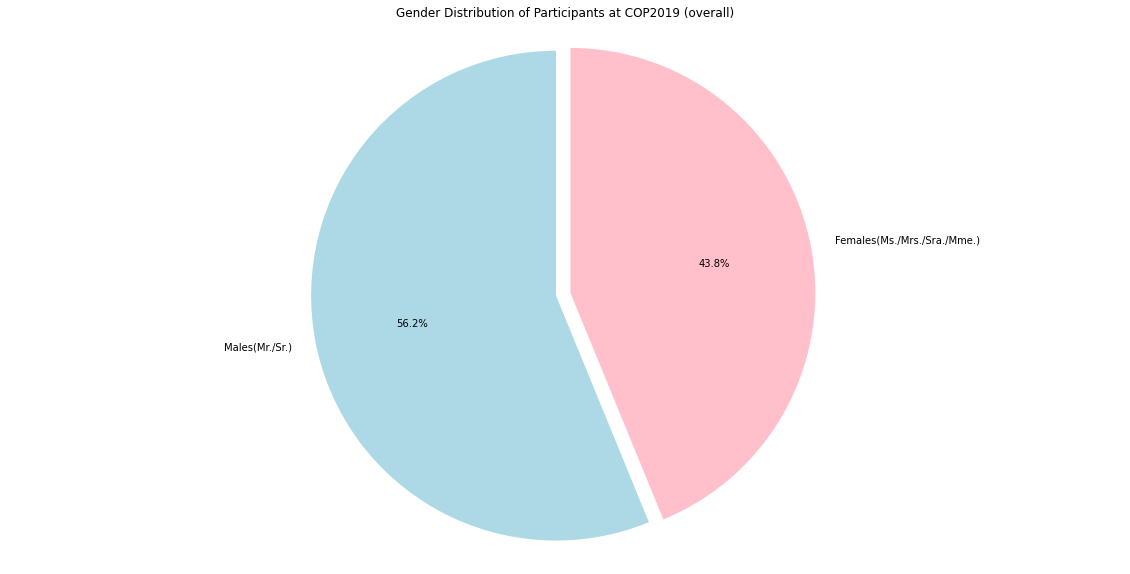

In [42]:
plt.figure(figsize=(20,10))
plt.pie(values,labels=labels,
        autopct='%1.1f%%', 
        explode = (0.06, 0), 
        colors = ["lightblue", "pink"],
        startangle = 90)
plt.title('Gender Distribution of Participants at COP2019 (overall)')
plt.axis('equal')
plt.savefig('COP2019_gender_distribution_piechart.png', facecolor = "white")
plt.show()

In [43]:
ngos = df[df.entity_type == "Non-governmental organizations"]
igos = df[df.entity_type == "Intergovernmental organizations"]

In [45]:
fem_ngos = ngos.FemaleMembers.sum()
male_ngos = ngos.MaleMembers.sum()
fem_igos = igos.FemaleMembers.sum()
male_igos = igos.MaleMembers.sum()

In [46]:
ngos_values = [male_ngos, fem_ngos]
ngos_labels = labels
igos_values = [male_igos, fem_igos]
igos_labels = labels


In [49]:
ngos_labels[1] = "Females\n(Ms./Mrs./Sra./Mme.)"

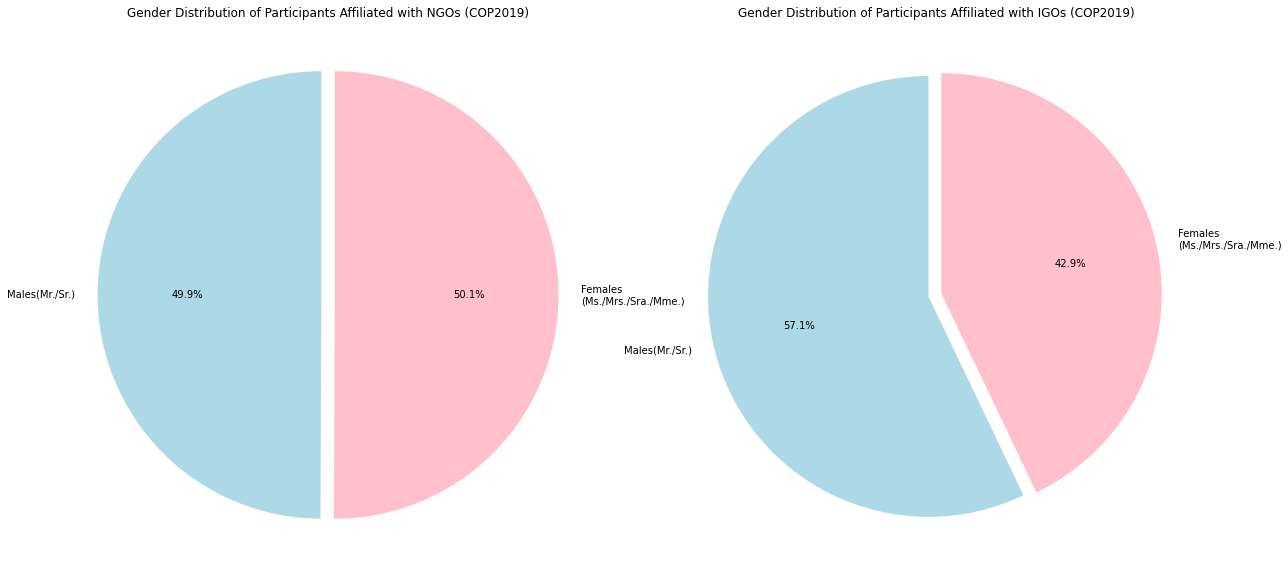

In [51]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.pie(ngos_values,labels=ngos_labels,
        autopct='%1.1f%%', 
        explode = (0.06, 0), 
        colors = ["lightblue", "pink"],
        startangle = 90)
plt.title('Gender Distribution of Participants Affiliated with NGOs (COP2019)')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(igos_values,labels=igos_labels,
        autopct='%1.1f%%', 
        explode = (0.06, 0), 
        colors = ["lightblue", "pink"],
        startangle = 90)
plt.title('Gender Distribution of Participants Affiliated with IGOs (COP2019)')
plt.axis('equal')
plt.savefig('COP2019_gender_distribution_NGOs_vs_IGOs.png', facecolor = "white")


In [68]:
igos_labels[1] = "Females(Ms./Mrs./\nSra./Mme.)"

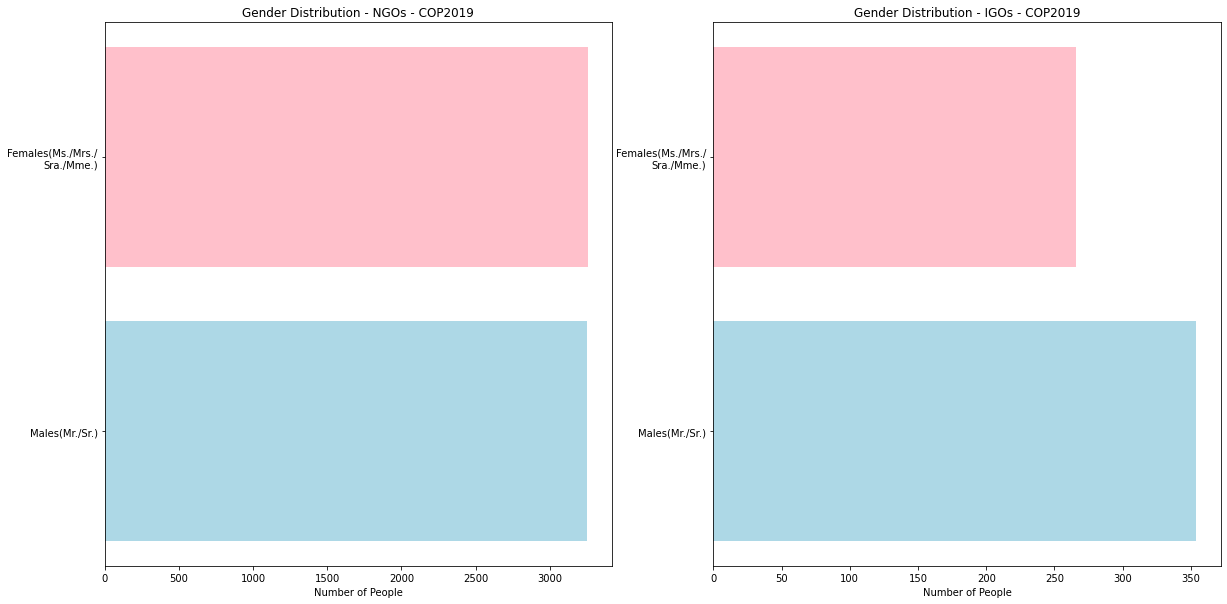

In [71]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)

plt.barh(ngos_labels, ngos_values, color =['lightblue', 'pink'])
 
plt.xlabel("Number of People")
plt.title("Gender Distribution - NGOs - COP2019")

plt.subplot(1, 2, 2)
plt.barh(igos_labels, igos_values, color =['lightblue', 'pink'])
 
plt.xlabel("Number of People")
plt.title("Gender Distribution - IGOs - COP2019")
plt.savefig('COP2019_gender_distribution_NGOs_vs_IGOs_BARPLOT.png', facecolor = "white")

In [73]:
df.entity_type.value_counts()

Non-governmental organizations                    1046
Parties                                            196
Intergovernmental organizations                     72
United Nations Secretariat units and bodies         28
Specialized agencies and related organizations      23
Observer States                                      1
Name: entity_type, dtype: int64

In [77]:
parties = df[(df.entity_type == "Parties") | (df.entity_type == "Observer States")]
UN = df[df.entity_type == "United Nations Secretariat units and bodies"]
sp_agencies = df[df.entity_type == "Specialized agencies and related organizations"]

In [78]:
parties_values = [parties.MaleMembers.sum(), parties.FemaleMembers.sum()]
UN_values = [UN.MaleMembers.sum(), UN.FemaleMembers.sum()]
sp_agencies_values = [sp_agencies.MaleMembers.sum(), sp_agencies.FemaleMembers.sum()]
parties_labels, UN_labels, sp_agencies_labels = labels, labels, labels

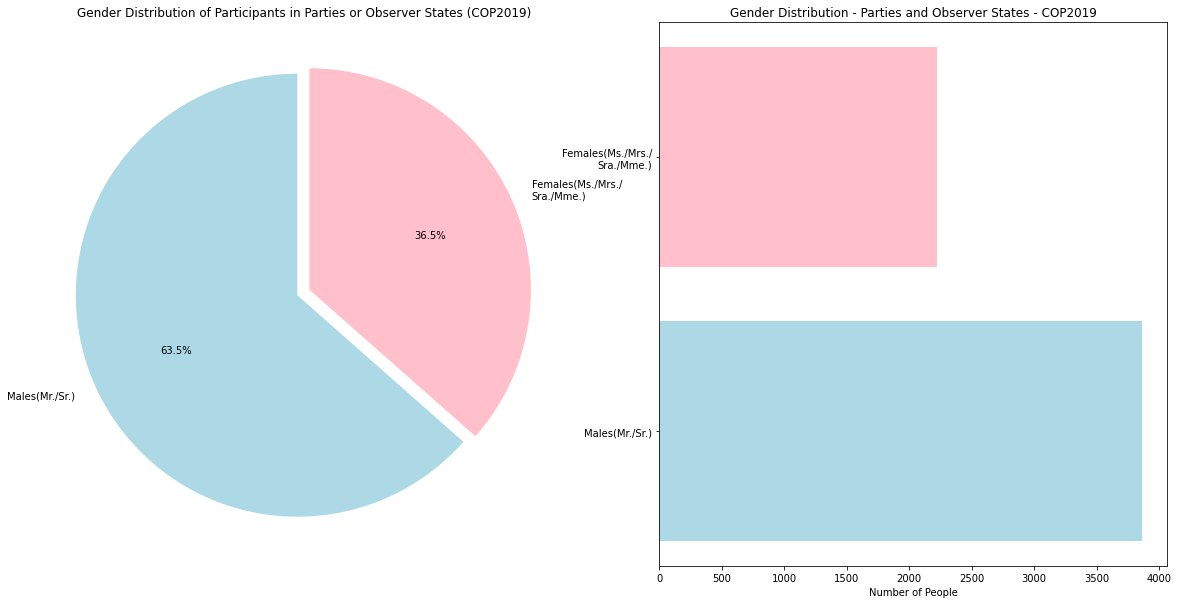

In [82]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)

plt.pie(parties_values,labels=parties_labels,
        autopct='%1.1f%%', 
        explode = (0.06, 0), 
        colors = ["lightblue", "pink"],
        startangle = 90)
plt.title('Gender Distribution of Participants in Parties or Observer States (COP2019)')
plt.axis('equal')

plt.subplot(1, 2, 2)

plt.barh(parties_labels, parties_values, color =['lightblue', 'pink'])
 
plt.xlabel("Number of People")
plt.title("Gender Distribution - Parties and Observer States - COP2019")
plt.savefig('COP2019_gender_distribution_Parties.png', facecolor = "white")

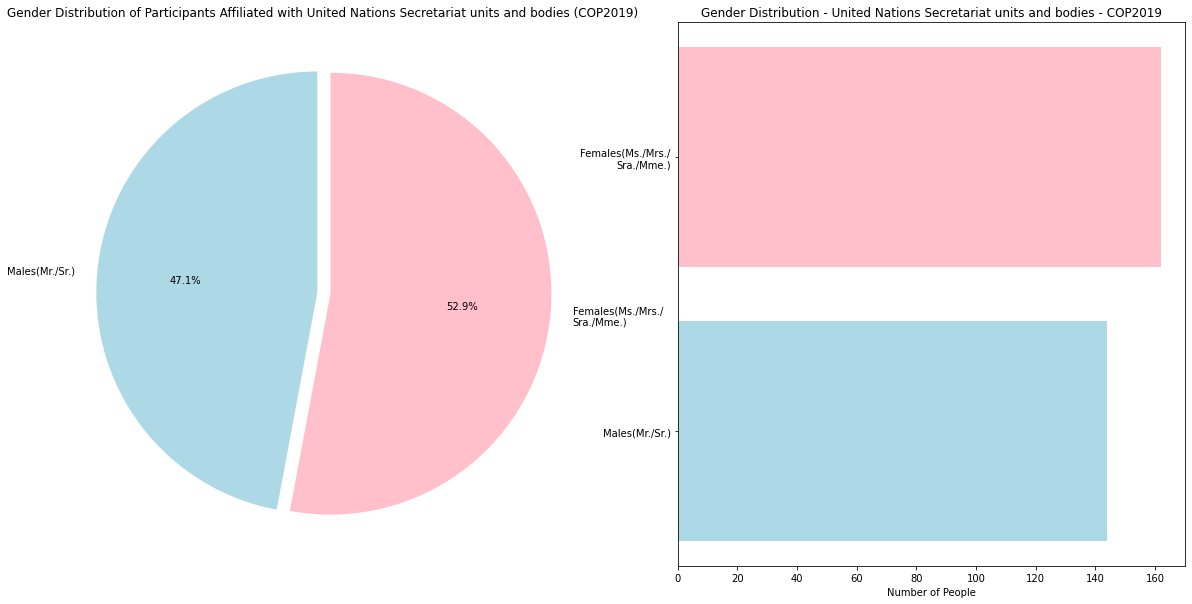

In [83]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)

plt.pie(UN_values,labels=UN_labels,
        autopct='%1.1f%%', 
        explode = (0.06, 0), 
        colors = ["lightblue", "pink"],
        startangle = 90)
plt.title('Gender Distribution of Participants Affiliated with United Nations Secretariat units and bodies (COP2019)')
plt.axis('equal')

plt.subplot(1, 2, 2)

plt.barh(UN_labels, UN_values, color =['lightblue', 'pink'])
 
plt.xlabel("Number of People")
plt.title("Gender Distribution - United Nations Secretariat units and bodies - COP2019")
plt.savefig('COP2019_gender_distribution_UN_Secretariat.png', facecolor = "white")

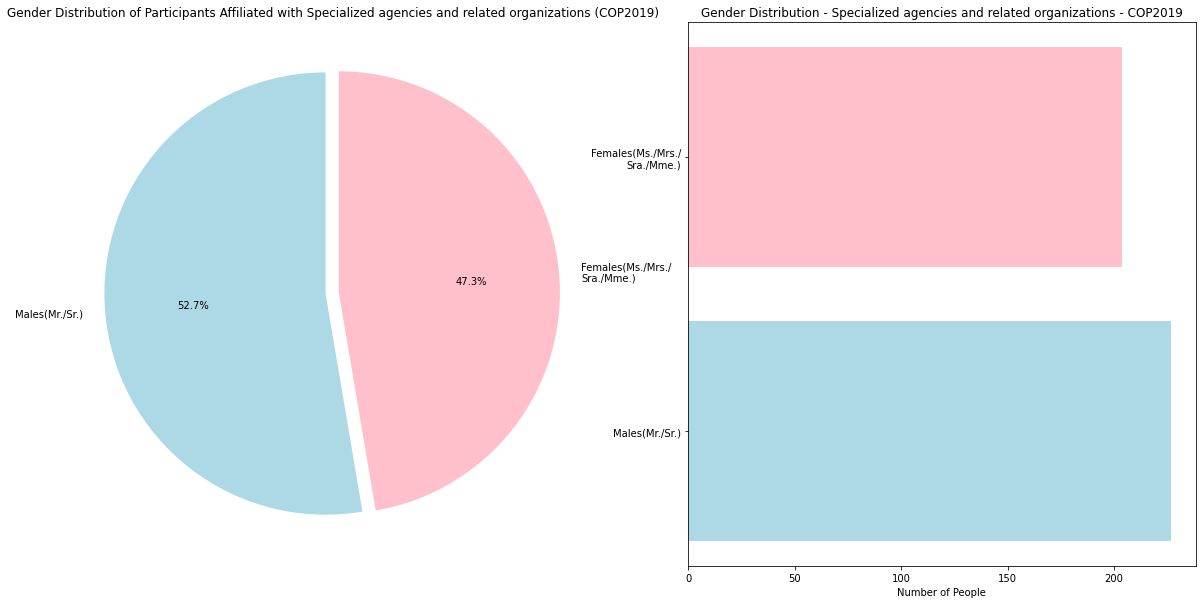

In [84]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)

plt.pie(sp_agencies_values,labels=sp_agencies_labels,
        autopct='%1.1f%%', 
        explode = (0.06, 0), 
        colors = ["lightblue", "pink"],
        startangle = 90)
plt.title('Gender Distribution of Participants Affiliated with Specialized agencies and related organizations (COP2019)')
plt.axis('equal')

plt.subplot(1, 2, 2)

plt.barh(sp_agencies_labels, sp_agencies_values, color =['lightblue', 'pink'])
 
plt.xlabel("Number of People")
plt.title("Gender Distribution - Specialized agencies and related organizations - COP2019")
plt.savefig('COP2019_gender_distribution_Specialized_agencies.png', facecolor = "white")